In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simulation settings
V = 50
x1, y1 = 220, 320
x2, y2 = 720, 320
t_stop = 5
dt = 0.025  # 25 ms
yBounce = 430
tstar = (yBounce - y1) / V
fps = int(1 / dt)

# Time values
t_values = np.arange(0, t_stop, dt)

# Position logic
def ball1_y(t):
    if t < tstar:
        return y1 + V * t
    else:
        return yBounce - V * (t - tstar)

def ball2_y(t):
    if t < tstar:
        return y2
    else:
        return y2 - 2 * V * (t - tstar)

# Setup figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 1000)
ax.set_ylim(0, 500)
ax.set_title("Bouncing Ball")
ball1, = ax.plot([], [], 'ro', markersize=10)
ball2, = ax.plot([], [], 'bo', markersize=10)
wall1 = plt.Rectangle((160, yBounce+10), 120, 10, color='black')
wall2 = plt.Rectangle((660, yBounce+10), 120, 10, color='black')
ax.add_patch(wall1)
ax.add_patch(wall2)

def init():
    ball1.set_data([], [])
    ball2.set_data([], [])
    return ball1, ball2, wall1, wall2

def update(frame):
    t = t_values[frame]
    y1_now = ball1_y(t)
    y2_now = ball2_y(t)
    ball1.set_data(x1, y1_now)
    ball2.set_data(x2, y2_now)
    wall2.set_xy((660, yBounce + 10 - V * t if t < tstar else yBounce + 10 - V * t))
    return ball1, ball2, wall1, wall2

anim = FuncAnimation(fig, update, frames=len(t_values), init_func=init, interval=dt*1000, blit=True)
plt.close()  # Avoid double display in notebooks

from IPython.display import HTML
HTML(anim.to_jshtml())



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
v = 1.0                  # snelheid in x-richting
t_max = 10               # totale simulatie tijd
dt = 0.05                # tijdstap in seconden
y = 0.5                  # constante y-positie

# Tijdwaarden
t_values = np.arange(0, t_max, dt)

# Setup plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, v * t_max + 1)
ax.set_ylim(0, 1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Deeltje met constante snelheid")

# Plot-elementen
particle, = ax.plot([], [], 'ro', markersize=10)
time_text = ax.text(0.98, 0.95, '', transform=ax.transAxes,
                    ha='right', va='top', fontsize=12)

# Initialisatie
def init():
    particle.set_data([], [])
    time_text.set_text('')
    return particle, time_text

# Update-functie
def update(frame):
    t = t_values[frame]
    x = v * t
    particle.set_data(x, y)
    time_text.set_text(f"t = {t:.2f} s")
    return particle, time_text

# Animatie aanmaken
ani = FuncAnimation(fig, update, frames=len(t_values),
                    init_func=init, interval=dt*1000, blit=True)

# In notebook tonen
from IPython.display import HTML
plt.close()  # voorkom dubbele weergave
HTML(ani.to_jshtml())


```{exercise} Particle movement
:label: ex_part
Consider a particle which travels a distance $x$. Find three different mathematical expressions for a force acting on the particle in such a way that the particle will travel the same distance in the same time for each $F(t)$.
```

```{solution} ex_part
:class: dropdown
Two are easy: constant motion ($F=ma \rightarrow s=vt$) and constant acceleration $a=const \rightarrow s=1/2at^2$, with $a=\frac{2v^2}{s}$.

Consider the third being a harmonic oscillating force field: $F(t)=Asin(2\pi ft)$
Then the equation of motion becomes:

$$a = F/m = \frac{A}{m}sin(2\pi ft)$$

$$v = \int{a}dt = \frac{A}{m2\pi f}cos(2\pi ft) + C_0$$

Assuming $v(0)=0 \rightarrow C_0 = -\frac{A}{m2\pi f}$

And, 

$$x = \int{v}dt = \frac{A}{m(2\pi f)^2}sin(2\pi ft) + C_0t + C_1$$

Assuming $x(0)=0 \rightarrow C_1 = 0$

Hence:

$$x = \frac{A}{m(2\pi f)^2}sin(2\pi ft) - \frac{A}{m2\pi f}t$$

Now, finding traveling the same distance in the same time AND the harmonic oscillation is complete (hence, $f=\frac{1}{t_e}$):

$$vt_e = \frac{A t_e^2}{m(2\pi)^2}sin(2\pi) - \frac{A t_e}{m2\pi}t_e$$

$$vt_e = - \frac{A t_e^2}{m2\pi}$$

$$v = - \frac{A t_e}{m2\pi}$$

$$\frac{m}{A} = - \frac{t_e}{v2\pi}$$

```

In [ ]:
# Animatie van een deeltje met constante snelheid en een deeltje met constante versnelling
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
v = 1.0                         # snelheid in x-richting
dt = 0.05                       # tijdstap in seconden
t_max = 10 + dt                 # totale simulatie tijd
y = 0.5                         # constante y-positie
a = 2*v**2/(v*(t_max-dt))       # versnelling in x-richting
m = 1.0                         # massa van het deeltje
A = - v*2*np.pi / (t_max-dt)    # amplitude van de sinusgolf
f = 1 / (t_max-dt)              # frequentie van de sinusgolf

# Vooraf posities berekenen
t_values = np.arange(0, t_max, dt)
x_values = v * t_values
x_values_2 = 1/2 * a * t_values**2  # voor een andere beweging
x_values_3 = A / (m * (2 * np.pi * f)**2) * np.sin(2 * np.pi * f * t_values) - A / (m * 2 * np.pi * f) * t_values

y_values = np.full_like(x_values, y)  # constante y

# Setup plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, x_values[-1] + 1)
ax.set_ylim(0, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")


particle, = ax.plot([], [], 'ro', markersize=10, label='Deeltje met constante snelheid')
particle_2, = ax.plot([], [], 'bo', markersize=10, label='Deeltje met constante versnelling')
particle_3, = ax.plot([], [], 'go', markersize=10, label='Deeltje in oscillerend krachtveld')

ax.legend(loc='upper left')
time_text = ax.text(0.98, 0.95, '', transform=ax.transAxes,
                    ha='right', va='top', fontsize=12)

# Initialisatie
def init():
    particle.set_data([], [])
    particle_2.set_data([], [])
    particle_3.set_data([], [])
    time_text.set_text('')
    return particle, time_text

# Update per frame
def update(frame):
    x = x_values[frame]
    x_2 = x_values_2[frame]
    x_3 = x_values_3[frame]
    y = y_values[frame]
    t = t_values[frame]
    particle.set_data([x], [y])
    particle_2.set_data([x_2], [2*y])
    particle_3.set_data([x_3], [.5*y])
    time_text.set_text(f"t = {t:.2f} s")
    return particle, time_text

# Animatie
ani = FuncAnimation(fig, update, frames=len(t_values),
                    init_func=init, interval=dt*1000, blit=True)

plt.close()
HTML(ani.to_jshtml())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Simulatieparameters
dt = 0.05
t_max = 10
t_values = np.arange(0, t_max, dt)

# Fysische parameters
vx = 1.0
Fy = 1.0
m = 1.0
ay = Fy / m

# Posities berekenen
x = vx * t_values
y = np.zeros_like(t_values)

x_burn_start = 2.0
x_burn_end = 4.0
i_start = np.argmax(x >= x_burn_start)
i_end = np.argmax(x >= x_burn_end)

for i in range(i_start, i_end+1):
    t_burn = t_values[i] - t_values[i_start]
    y[i] = 0.5 * ay * t_burn**2

vy_final = ay * (t_values[i_end] - t_values[i_start])
y0 = y[i_end]
t0 = t_values[i_end]
for i in range(i_end, len(t_values)):
    y[i] = y0 + vy_final * (t_values[i] - t0)

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, np.max(x)+1)
ax.set_ylim(0, np.max(y)+1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("🚀 Raket met stuwfase tussen x=2 en x=4")

# Raket (emoji als tekst)
rocket = ax.text(0, 0, '🚀', fontsize=14)

# Trail
trail, = ax.plot([], [], 'r-', lw=1)

# Tijd
time_text = ax.text(0.98, 0.95, '', transform=ax.transAxes,
                    ha='right', va='top', fontsize=12)

# Init
def init():
    rocket.set_position((0, 0))
    trail.set_data([], [])
    time_text.set_text('')
    return rocket, trail, time_text

# Update
def update(frame):
    rocket.set_position((x[frame], y[frame]))
    trail.set_data(x[:frame+1], y[:frame+1])
    time_text.set_text(f"t = {t_values[frame]:.2f} s")
    return rocket, trail, time_text

# Animatie
ani = FuncAnimation(fig, update, frames=len(t_values),
                    init_func=init, interval=dt*1000, blit=True)

plt.close()
HTML(ani.to_jshtml())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 7)
y = np.linspace(-2, 2, 7)
X, Y = np.meshgrid(x, y)
U = - Y
V = X**2

path_x = [0, 1]
path_y = [0, 0]


plt.figure()
plt.arrow(1, 0, 0, 1, head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2)
plt.plot(path_x, path_y, color='red', linewidth=2, marker='o', markersize=5)

plt.quiver(X, Y, U, V, color='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('images/force_field.png', dpi=300)
plt.show()



1. $E_{kin}=\frac{1}{2}mv^2=\frac{1}{2}*10*2^2=20\text{J}$
1. $E_{kin}=\frac{1}{2}mv^2=\frac{1}{2}\cdot10\cdot2^2=20\text{J}$
1. $E_{kin}=\frac{1}{2}mv^2=\frac{1}{2}(10)(2)^2=20\text{J}$
1. $E_{kin}=\frac{1}{2}mv^2=\frac{1}{2}.(10).(2)^2=20\text{J}$
1. $E_{kin}=\frac{1}{2}mv^2=\frac{1}{2}(10\text{kg})(2\text{m/s})^2=20\text{J}$
1. $E_{kin}=\frac{1}{2}mv^2=\frac{1}{2}.(10\text{kg}).(2\text{m/s})^2=20\text{J}$
1. $E_{kin}=\frac{1}{2}mv^2=\frac{1}{2} \cdot 10 \bullet 2^2=20\text{J}$

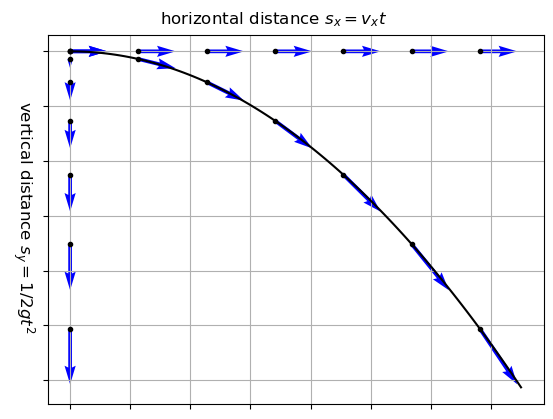

In [48]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 100)
v_x = 30
a = 9.81

s_x = v_x * t
s_y = -0.5 * a * t**2


N = 15

plt.figure()
plt.plot(s_x, s_y, 'k-' )
plt.plot(s_x[::N], s_y[::N], 'k.' )
plt.plot(s_x[::N], s_y[::N]*0, 'k.' )
plt.plot(s_x[::N]*0, s_y[::N], 'k.' )

plt.quiver(s_x[::N], s_y[::N]*0, v_x, 0, color='blue', scale=400)
plt.quiver(s_x[::N]*0, s_y[::N], 0, -a*t[::N], color='blue', scale=400)
plt.quiver(s_x[::N], s_y[::N], v_x, -a*t[::N], color='blue', scale=400)


plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid(visible=True)
plt.text(30, 10, 'horizontal distance $s_x=v_xt$', fontsize=12, color='black')
plt.text(-20, -100, 'vertical distance $s_y=1/2gt^2$', fontsize=12, color='black',rotation=-90)
plt.savefig('images/parmotionv.png', dpi=300)
plt.show()

